In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank=pd.read_excel('bank-additional-full.xlsx')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df=pd.DataFrame(data=bank)
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 dtype('float64'): Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
        'nr.employed'],
       dtype='object'),
 dtype('O'): Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome', 'y'],
       dtype='object')}

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


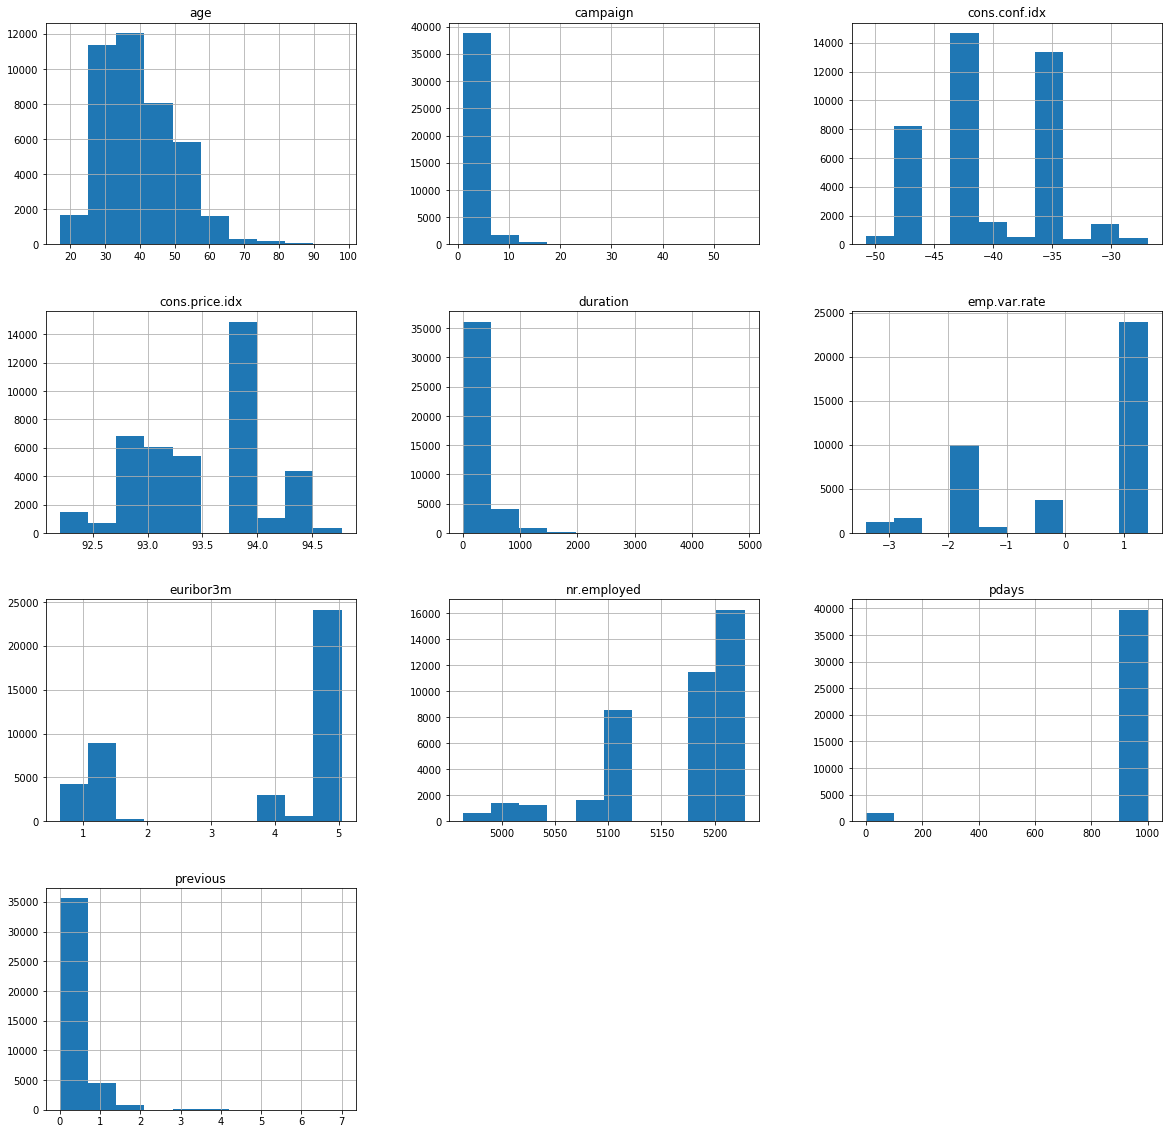

In [8]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x281d8e3ca08>,
 'caps': [<matplotlib.lines.Line2D at 0x281d8e59b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x281d8e3c608>],
 'medians': [<matplotlib.lines.Line2D at 0x281d8e88508>],
 'fliers': [<matplotlib.lines.Line2D at 0x281d8e0a4c8>],
 'means': []}

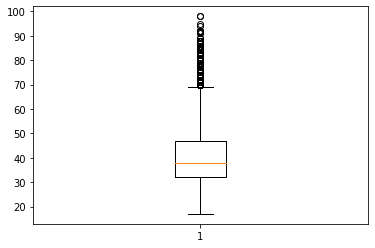

In [9]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e87ce08348>,
 'caps': [<matplotlib.lines.Line2D at 0x1e87ce5f348>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e87cd94108>],
 'medians': [<matplotlib.lines.Line2D at 0x1e87ce71b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e87bc4ba88>],
 'means': []}

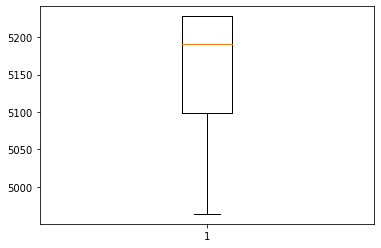

In [10]:
plt.boxplot(df['nr.employed'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e87cce7c08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e87cbde488>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e87b9ddd48>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e87b9ddbc8>}

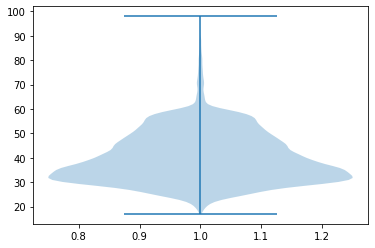

In [11]:
plt.violinplot(df['age'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e87c3b7948>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e87ba4c748>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e87c3dd8c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e87c3ddfc8>}

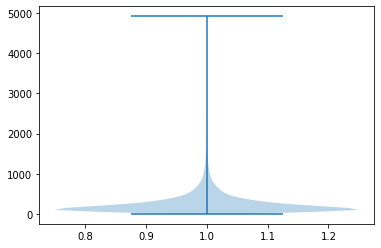

In [12]:
plt.violinplot(df['duration'])

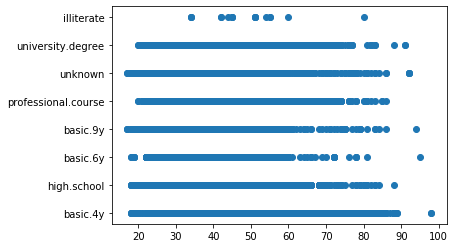

In [13]:
plt.scatter('age','education',data=df)

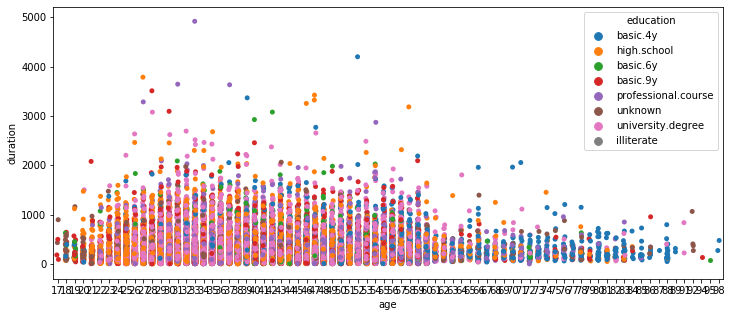

In [14]:
plt.figure(figsize=(12,5))
sns.stripplot('age','duration',hue='education',data=df)

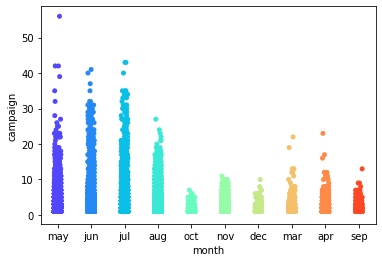

In [15]:
sns.stripplot('month','campaign',data=df,palette='rainbow')

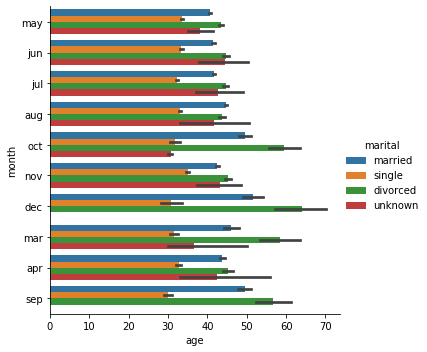

In [17]:
sns.catplot('age','month',hue='marital',data=df,kind='bar')

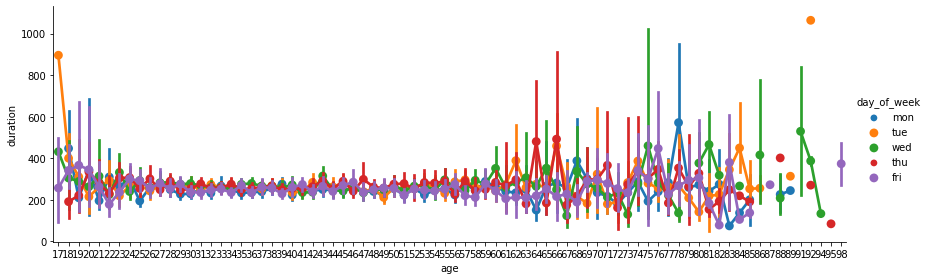

In [22]:
sns.catplot('age','duration',hue='day_of_week',height=4,aspect=3,data=df,kind='point')

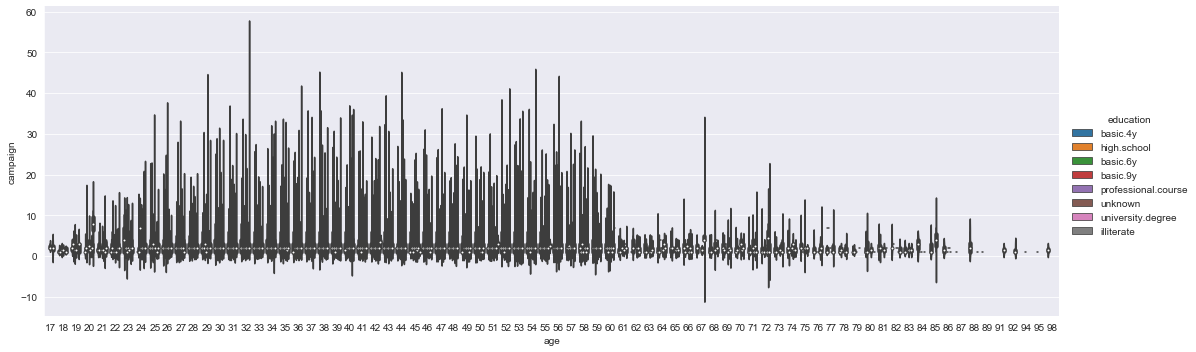

In [26]:
sns.set_style('darkgrid')
sns.catplot('age','campaign',hue='education',height=5,aspect=3,data=df,kind='violin')

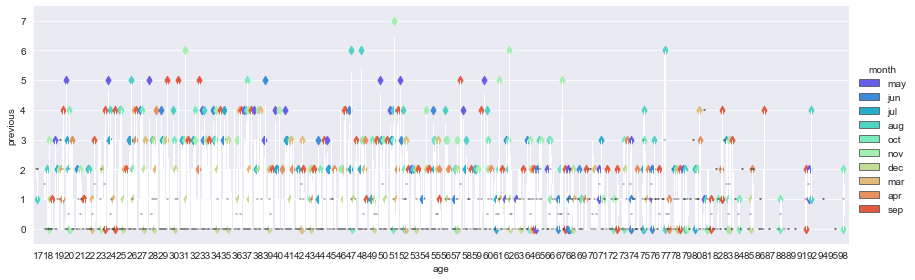

In [28]:
sns.catplot('age','previous',hue='month',height=4,aspect=3,data=df,palette='rainbow',kind='boxen')

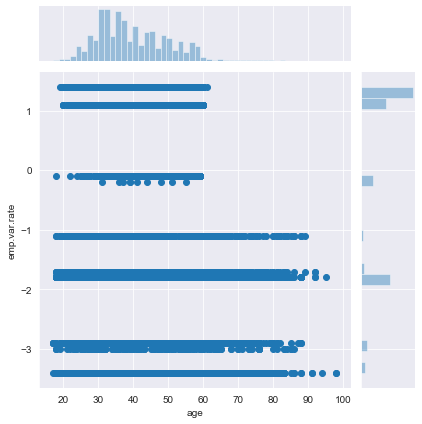

In [29]:
sns.jointplot('age','emp.var.rate',height=6,ratio=5,space=.2,data=df,kind='scatter')

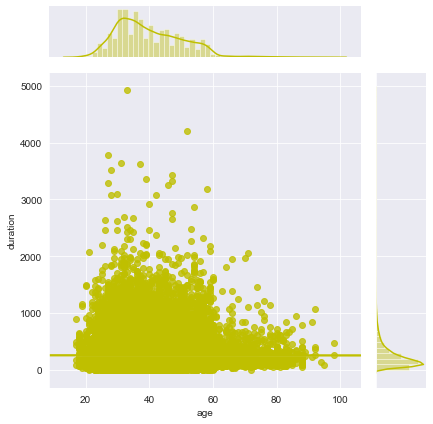

In [32]:
sns.jointplot('age','duration',height=6,ratio=5,space=.3,color='y',data=df,kind='reg')

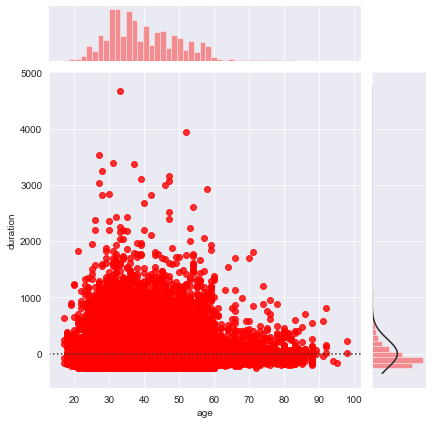

In [33]:
sns.jointplot('age','duration',height=6,ratio=5,space=.2,color='r',data=df,kind='reside')

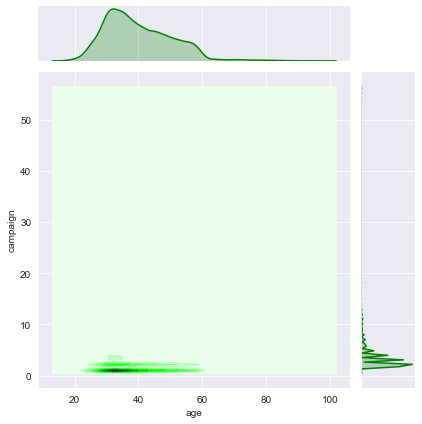

In [34]:
sns.jointplot('age','campaign',height=6,ratio=5,space=.2,color='g',data=df,kind='kde')

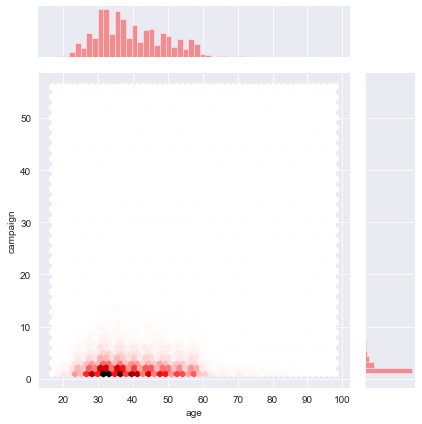

In [35]:
sns.jointplot('age','campaign',height=6,ratio=5,space=.3,color='r',data=df,kind='hex')

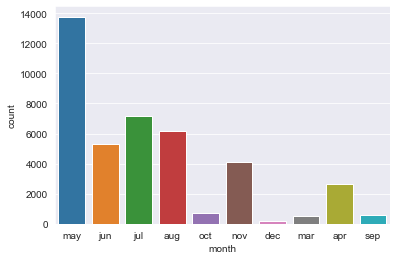

In [36]:
sns.countplot(df['month'])

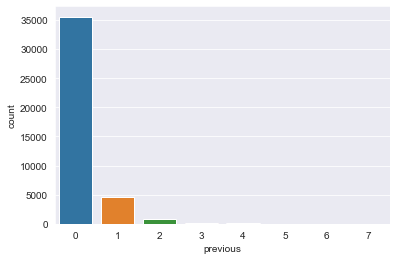

In [38]:
sns.countplot(df['previous'])

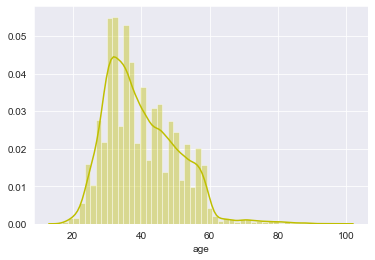

In [39]:
sns.distplot(df['age'],color='y')

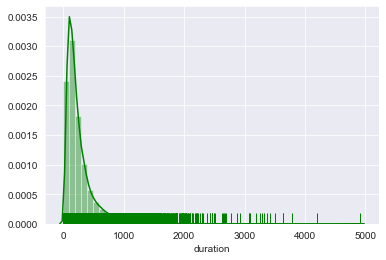

In [40]:
sns.distplot(df['duration'],color='g',rug=True)

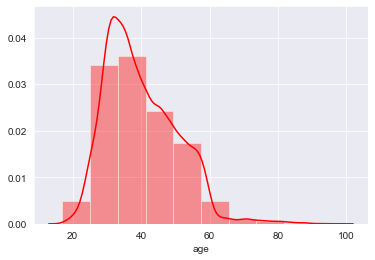

In [41]:
sns.distplot(df['age'],color='r',bins=10)

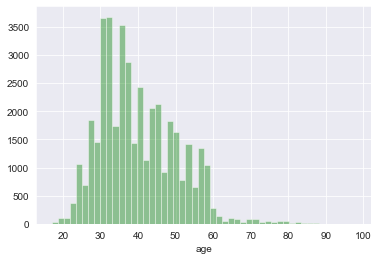

In [42]:
sns.distplot(df['age'],color='g',kde=False)

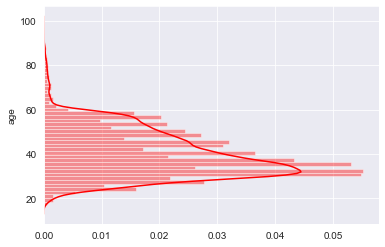

In [44]:
sns.distplot(df['age'],color='r',vertical=True)

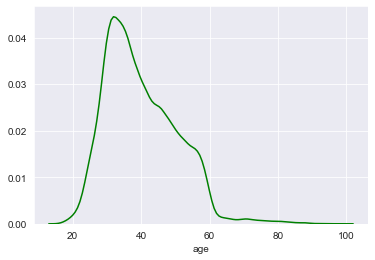

In [45]:
sns.distplot(df['age'],color='g',hist=False)

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

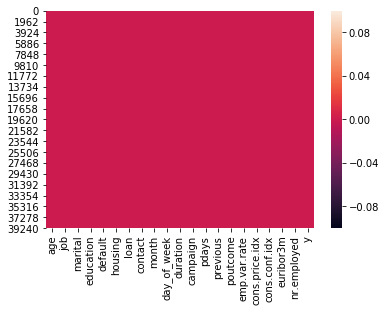

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


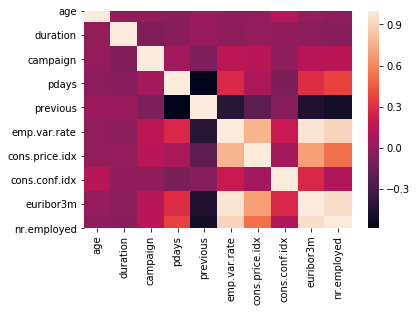

In [13]:
sns.heatmap(df.corr())

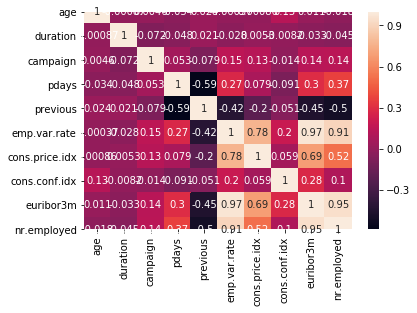

In [14]:
sns.heatmap(df.corr(),annot=True)

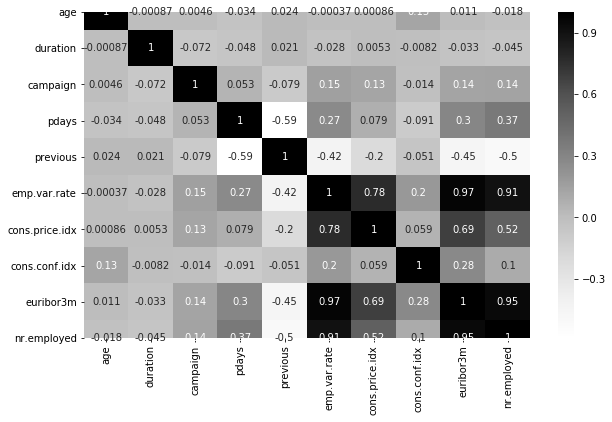

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Greys',annot=True)

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 dtype('float64'): Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
        'nr.employed'],
       dtype='object'),
 dtype('O'): Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome', 'y'],
       dtype='object')}

In [18]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [19]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [20]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [21]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [22]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [23]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [25]:
df.drop(['duration','contact','month','day_of_week','poutcome','pdays'],axis=1,inplace=True)

In [26]:
df.head()

,age,job,marital,education,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,0,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
le_count=0
for col in df.columns[1:]:
    if df[col].dtypes=='object':
        if len(list(df[col].unique()))<=13:
            le.fit(df[col])
            df[col]=le.fit_transform(df[col])
            le_count +=1
print('{} colums were label encode.'.format(le_count))

7 colums were label encode.


In [30]:
df.head()

,age,job,marital,education,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,0,1.1,93.994,-36.4,4.857,5191.0,0


In [31]:
x=df.iloc[:,0:-1]
x.shape

(41188, 14)

In [32]:
pca=PCA(n_components=10)

In [33]:
x=pca.fit_transform(x)
x.shape

(41188, 10)

In [34]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,-23.984587,16.366125,2.560070,-1.415315,-1.711356,3.341667,1.107082,0.315448,-0.231662,0.265402
1,-23.975484,17.298598,3.167368,2.853645,-1.652775,0.824584,1.168200,0.413878,-0.232086,0.249365
2,-24.025104,-2.645039,4.546061,2.643847,-1.596560,1.350857,-0.794446,0.808489,-0.381429,-0.231066
3,-24.027836,0.390101,3.381120,-4.445485,-1.637622,2.476120,1.117427,0.355487,-0.249367,-0.102066
4,-23.977091,16.294131,3.235249,2.842979,-1.647496,0.814769,1.024473,0.418155,1.764018,0.192807
...,...,...,...,...,...,...,...,...,...,...
41183,203.573447,31.703710,-10.649292,2.615917,-0.669402,-2.150107,0.292854,4.594187,-0.393392,0.445089
41184,203.498179,4.787212,-9.238243,-1.634039,-0.578099,-1.797359,2.231673,4.192398,-0.274708,-0.143400
41185,203.524994,14.734893,-9.428558,2.535969,0.403603,-2.628076,0.298533,4.607391,-0.405860,0.043742
41186,203.500781,2.799590,-8.145749,6.235205,-0.579970,-0.835789,2.236114,4.167914,-0.256970,-0.213045


In [35]:
df.head()

,age,job,marital,education,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,0,1.1,93.994,-36.4,4.857,5191.0,0


In [36]:
x=df.iloc[:,0:-1]
x.shape

(41188, 14)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()

In [39]:
x=scaler.fit_transform(x)

In [40]:
y=df.iloc[:,-1]
y.shape

(41188,)

In [41]:
models=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]

In [42]:
max_acc_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accu_values=accuracy_score(y_test,predm)
        print('Accuracy score corresponing to random state',r_state,'is:',accu_values)
        if accu_values>max_acc_score:
            max_acc_score=accu_values
            final_state=r_state
            final_model=m
print()
print()
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_acc_score,'and models is',final_model)

Accuracy score corresponing to random state 40 is: 0.8783127655270079
Accuracy score corresponing to random state 40 is: 0.8322880841594174
Accuracy score corresponing to random state 40 is: 0.88195427877807
Accuracy score corresponing to random state 40 is: 0.7755411693303662
Accuracy score corresponing to random state 41 is: 0.888124620675703
Accuracy score corresponing to random state 41 is: 0.8365365162856565
Accuracy score corresponing to random state 41 is: 0.8866073234877605
Accuracy score corresponing to random state 41 is: 0.775642322476229
Accuracy score corresponing to random state 42 is: 0.8845842605705038
Accuracy score corresponing to random state 42 is: 0.8282419583249039
Accuracy score corresponing to random state 42 is: 0.8850900262998179
Accuracy score corresponing to random state 42 is: 0.774428484725875
Accuracy score corresponing to random state 43 is: 0.8822577382156586
Accuracy score corresponing to random state 43 is: 0.8314788589925146
Accuracy score corresponi

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=48)

In [44]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8898442241553712
[[8521  282]
 [ 807  276]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8803
           1       0.49      0.25      0.34      1083

    accuracy                           0.89      9886
   macro avg       0.70      0.61      0.64      9886
weighted avg       0.87      0.89      0.87      9886



In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameter={'criterion':('gini','entropy'),'n_estimators':range(10,20)}
grid=GridSearchCV(rfc,param_grid=parameter)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [84]:
rfc=RandomForestClassifier(criterion='entropy',n_estimators=14)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8895407647177828
[[8541  262]
 [ 830  253]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8803
           1       0.49      0.23      0.32      1083

    accuracy                           0.89      9886
   macro avg       0.70      0.60      0.63      9886
weighted avg       0.87      0.89      0.87      9886



In [ ]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

In [85]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]
y_pred_prob

array([0.        , 0.        , 0.        , ..., 0.21428571, 0.        ,
       0.17857143])

In [86]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [87]:
fpr

array([0.00000000e+00, 2.27195274e-04, 1.47676928e-03, 1.47676928e-03,
       3.86231966e-03, 3.97591730e-03, 3.97591730e-03, 4.08951494e-03,
       4.08951494e-03, 7.95183460e-03, 7.95183460e-03, 8.06543224e-03,
       8.06543224e-03, 8.06543224e-03, 1.30637283e-02, 1.30637283e-02,
       1.31773259e-02, 1.31773259e-02, 1.32909235e-02, 1.32909235e-02,
       1.36317165e-02, 1.97659889e-02, 2.01067818e-02, 2.02203794e-02,
       2.02203794e-02, 2.03339771e-02, 2.03339771e-02, 2.05611723e-02,
       2.09019652e-02, 2.09019652e-02, 2.10155629e-02, 2.86266046e-02,
       2.87402022e-02, 2.87402022e-02, 2.88537998e-02, 2.93081904e-02,
       2.95353857e-02, 2.95353857e-02, 2.97625809e-02, 4.08951494e-02,
       4.13495399e-02, 4.13495399e-02, 4.14631376e-02, 4.18039305e-02,
       4.18039305e-02, 4.21447234e-02, 4.24855163e-02, 4.24855163e-02,
       4.24855163e-02, 4.24855163e-02, 4.25991139e-02, 4.25991139e-02,
       4.27127116e-02, 5.74804044e-02, 5.77075997e-02, 5.78211973e-02,
      

In [88]:
tpr

array([0.        , 0.00554017, 0.01477378, 0.01569714, 0.0498615 ,
       0.0498615 , 0.05170822, 0.05170822, 0.05263158, 0.08494922,
       0.08587258, 0.08587258, 0.0877193 , 0.08864266, 0.12003693,
       0.1209603 , 0.1209603 , 0.12188366, 0.12188366, 0.12280702,
       0.12280702, 0.17174515, 0.17174515, 0.17266851, 0.17359187,
       0.1754386 , 0.17636196, 0.17636196, 0.17636196, 0.17728532,
       0.17728532, 0.22622345, 0.22622345, 0.22807018, 0.22807018,
       0.22899354, 0.23084026, 0.23268698, 0.23361034, 0.30378578,
       0.30378578, 0.30470914, 0.30470914, 0.3056325 , 0.30655586,
       0.30840259, 0.30840259, 0.30932595, 0.31209603, 0.31301939,
       0.31301939, 0.31394275, 0.31394275, 0.37303786, 0.37488458,
       0.37488458, 0.37488458, 0.37580794, 0.37580794, 0.37950139,
       0.37950139, 0.37950139, 0.37950139, 0.38042475, 0.38042475,
       0.4478301 , 0.4478301 , 0.44875346, 0.44875346, 0.44875346,
       0.44875346, 0.44967682, 0.45244691, 0.45337027, 0.45429

In [89]:
threshold

array([2.        , 1.        , 0.92857143, 0.88095238, 0.85714286,
       0.84166667, 0.81428571, 0.81309524, 0.79166667, 0.78571429,
       0.76785714, 0.76190476, 0.75      , 0.73809524, 0.71428571,
       0.70238095, 0.69642857, 0.69166667, 0.69047619, 0.67857143,
       0.64642857, 0.64285714, 0.61904762, 0.61904762, 0.60952381,
       0.60714286, 0.60204082, 0.6       , 0.5952381 , 0.58928571,
       0.58333333, 0.57142857, 0.55714286, 0.54761905, 0.53571429,
       0.53571429, 0.52380952, 0.51785714, 0.51190476, 0.5       ,
       0.48571429, 0.48214286, 0.47959184, 0.47619048, 0.475     ,
       0.46428571, 0.45833333, 0.45714286, 0.45238095, 0.44897959,
       0.44642857, 0.4452381 , 0.43928571, 0.42857143, 0.41071429,
       0.4047619 , 0.4047619 , 0.4       , 0.39642857, 0.39285714,
       0.38690476, 0.38571429, 0.37142857, 0.37142857, 0.36904762,
       0.35714286, 0.35      , 0.34642857, 0.34285714, 0.33928571,
       0.33333333, 0.33333333, 0.32142857, 0.31666667, 0.31547

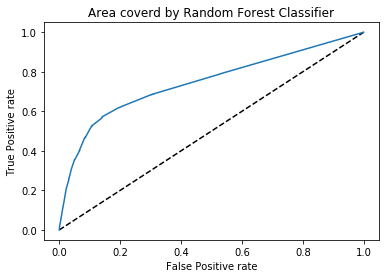

In [59]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClasifier')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Area coverd by Random Forest Classifier')
plt.show()